In [17]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# data_pack_num = 0
# data_mega_pack = get_data_from_file(100)
# data_pack = data_mega_pack[1]

J, _  = GenerateJ(100,5,5)

# Parametry algorytmu genetycznego
population_sizes = [50, 100, 200, 300]
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
generations = [500, 1000, 1500, 2000]



# population_sizes = [50]
# mutation_rates = [0.1]
# generations = [500]

results = []


In [19]:
for pop_size in population_sizes:
    for mut_rate in mutation_rates:
        for gen in generations:
            ga = GeneticAlgorithm(J, 
                        pop_size, 
                        mut_rate, 
                        gen,
                        mutation_type="mid", 
                        crossover_type="nearest", 
                        selection_type="roulette")
            best_solutions = ga.Genetic()

            best_solution = best_solutions[-1]
            best_solution_Cmax = C_Max(J,best_solution)
            results.append({'Population Size': pop_size, 'Mutation Rate': mut_rate, 'Generations': gen, 'Cmax': best_solution_Cmax})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)


In [20]:
# Wyświetl wyniki
print(df)
#plot_schedule_fancy(best_solution, J, start_t(J, best_solution,(EvaluateC(J,best_solution)))) 

    Population Size  Mutation Rate  Generations  Cmax
0                50            0.1          500   555
1                50            0.1         1000   555
2                50            0.1         1500   556
3                50            0.1         2000   558
4                50            0.2          500   552
..              ...            ...          ...   ...
75              300            0.4         2000   554
76              300            0.5          500   550
77              300            0.5         1000   553
78              300            0.5         1500   552
79              300            0.5         2000   552

[80 rows x 4 columns]


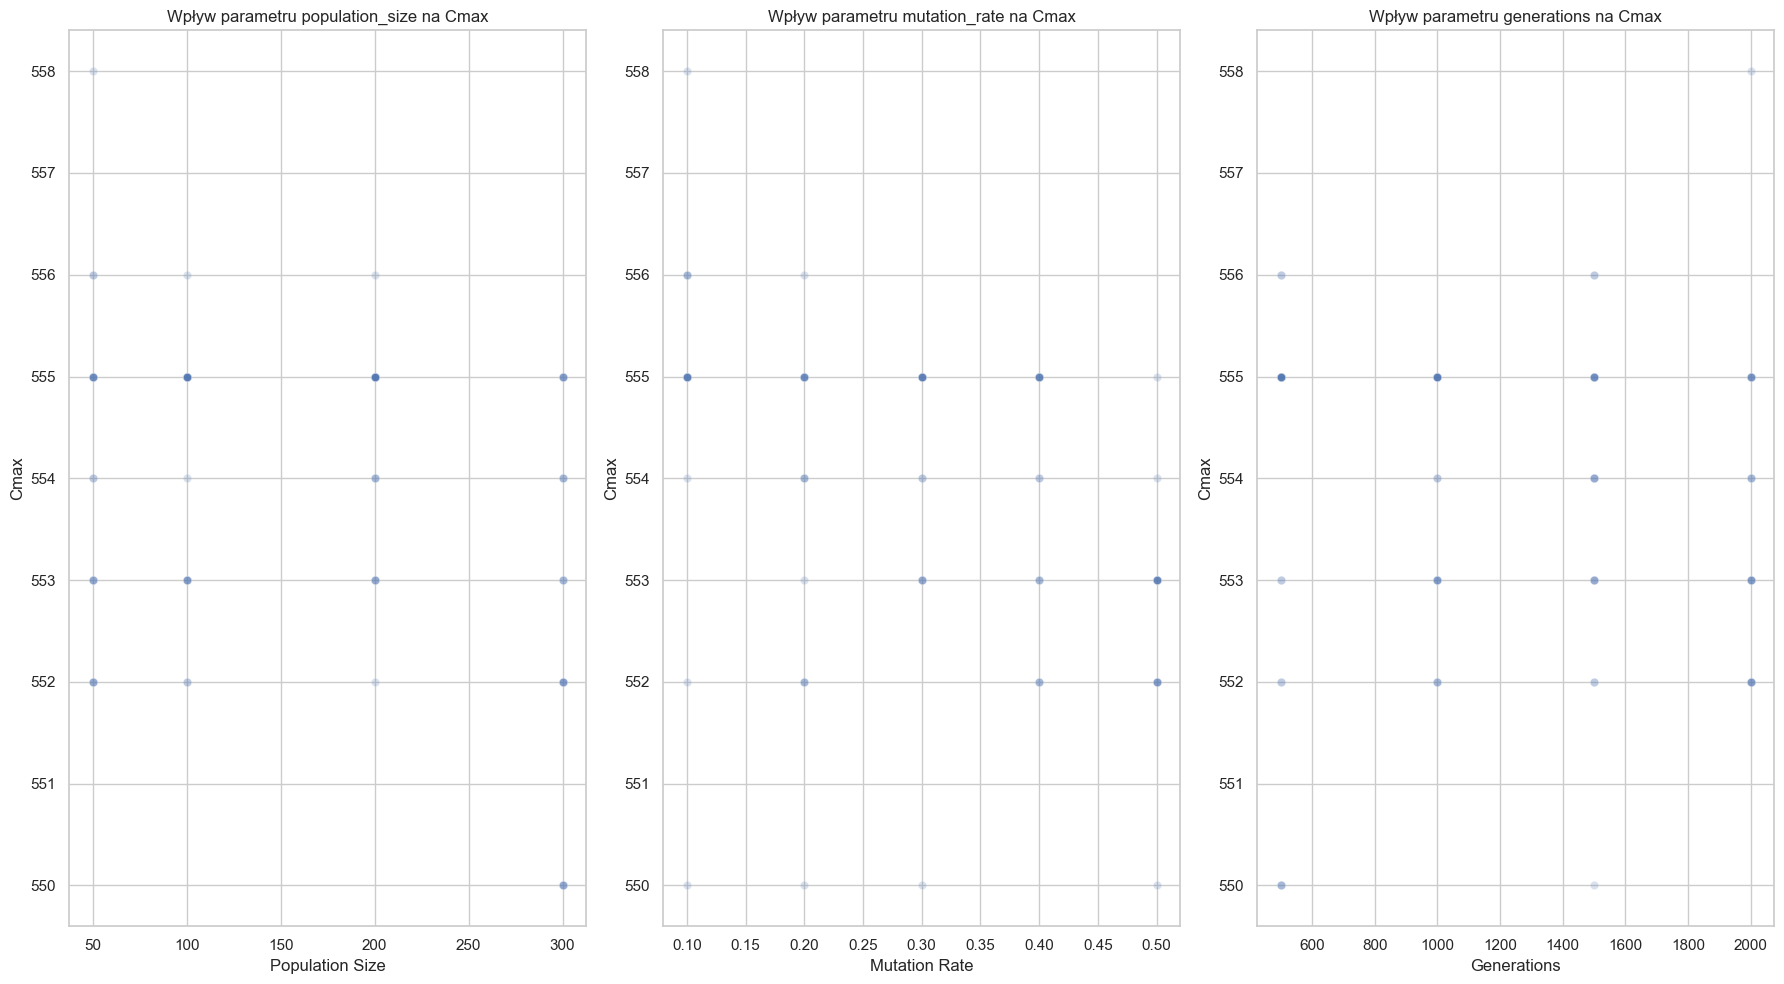

In [21]:
# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Utwórz siatkę wykresów
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Wykres zależności Cmax od parametru population_size
sns.scatterplot(ax=axes[0], x='Population Size', y='Cmax', data=df, alpha=0.2)
axes[0].set_title('Wpływ parametru population_size na Cmax')
axes[0].set_xlabel('Population Size')
axes[0].set_ylabel('Cmax')

# Wykres zależności Cmax od parametru mutation_rate
sns.scatterplot(ax=axes[1], x='Mutation Rate', y='Cmax', data=df, alpha=0.2)
axes[1].set_title('Wpływ parametru mutation_rate na Cmax')
axes[1].set_xlabel('Mutation Rate')
axes[1].set_ylabel('Cmax')

# Wykres zależności Cmax od parametru generations
sns.scatterplot(ax=axes[2], x='Generations', y='Cmax', data=df, alpha=0.2)
axes[2].set_title('Wpływ parametru generations na Cmax')
axes[2].set_xlabel('Generations')
axes[2].set_ylabel('Cmax')

# Wyświetl wykresy
plt.tight_layout()
plt.show()


In [22]:
# Znajdź najmniejszą wartość Cmax
min_Cmax = df['Cmax'].min()

# Wybierz rekordy z najmniejszym Cmax
min_Cmax_records = df[df['Cmax'] == min_Cmax]

# Wyświetl wyniki
print(min_Cmax_records)

    Population Size  Mutation Rate  Generations  Cmax
60              300            0.1          500   550
64              300            0.2          500   550
70              300            0.3         1500   550
76              300            0.5          500   550
